In [2]:
#importing the libraries
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans




In [3]:
iris = datasets.load_iris()
print(iris.data)
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [6]:
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

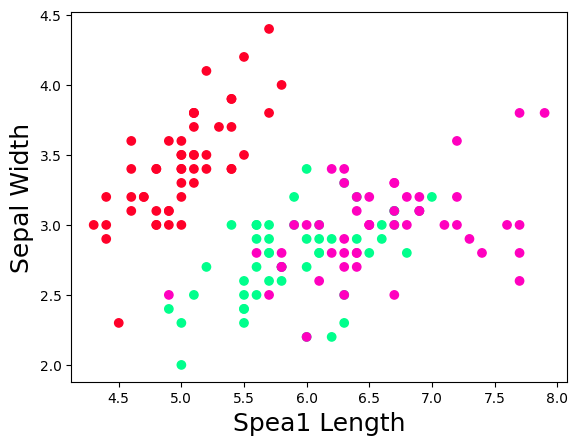

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

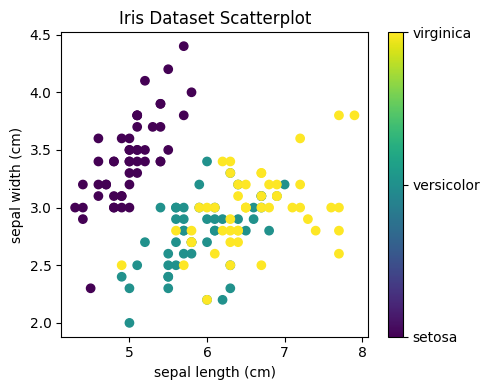

In [8]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1
 
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
 
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Iris Dataset Scatterplot')
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
 
plt.tight_layout()
plt.show()

     sepal length (cm)  sepal width (cm)  petal length (cm)  clusters
0                  5.1               3.5                1.4         0
1                  4.9               3.0                1.4         0
2                  4.7               3.2                1.3         0
3                  4.6               3.1                1.5         0
4                  5.0               3.6                1.4         0
..                 ...               ...                ...       ...
145                6.7               3.0                5.2         0
146                6.3               2.5                5.0         0
147                6.5               3.0                5.2         0
148                6.2               3.4                5.4         0
149                5.9               3.0                5.1         0

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)  petal length (cm)  clusters
0                  5.1               3.5                1.4       

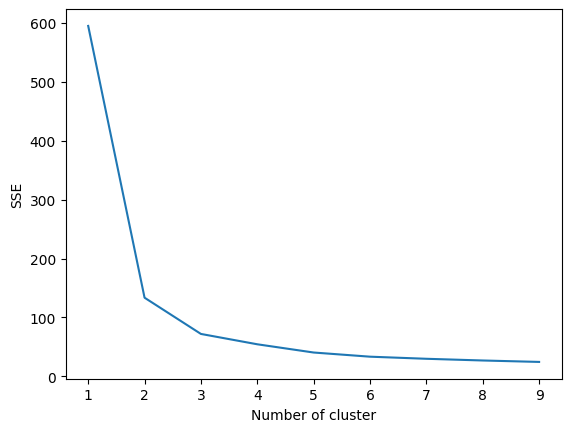

In [11]:
#Now we will implement 'The elbow method' on the Iris dataset. 
#The elbow method allows us to pick the optimum amount of clusters for classification. 
#Although we already know the answer is 3 it is still interesting to run.
#Finding the optimum number of clusters for k-means classification


X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 
#This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 
#Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [90]:
#Applying kmeans to the dataset / Creating the kmeans classifier
km = KMeans(n_clusters = 3, random_state=0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [91]:
centers = km.cluster_centers_
print(centers)

[[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]


Text(0.5, 1.0, 'Predicted')

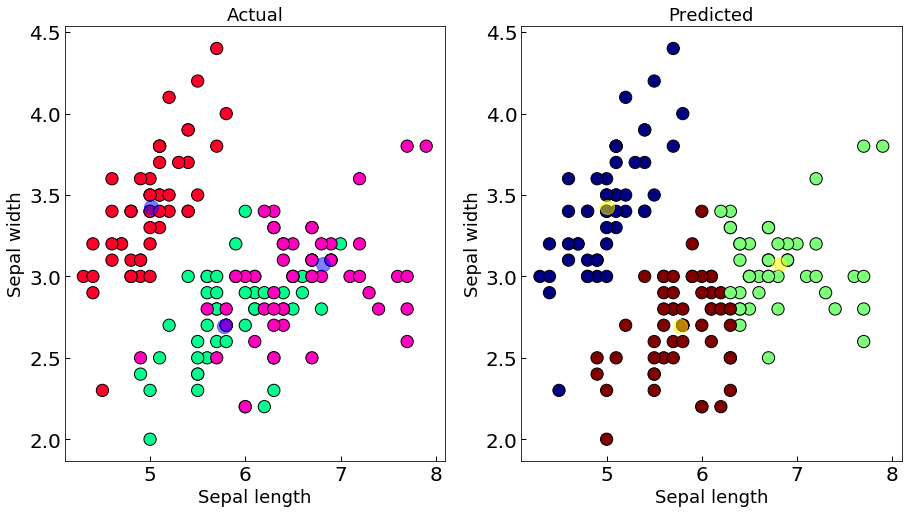

In [95]:

#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers



fig, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].scatter(iris.data[:, 0], iris.data[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=5, width=1, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[1].scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].tick_params(direction='in', length=5, width=1, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)
